# 🤖 Методы обучения без учителя и понижения размерности🤖

## 👨🏻‍💻 Практика 1 - Пример на K-Means

In [2]:
# убираем warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

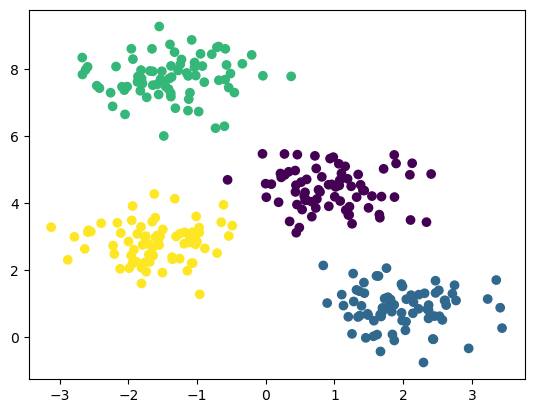

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.show()

Загрузите набор данных Iris (from sklearn.datasets import load_iris).

Примените к нему алгоритм K-Means с разным количеством кластеров (k).

Визуализируйте результаты и определите оптимальное значение k.

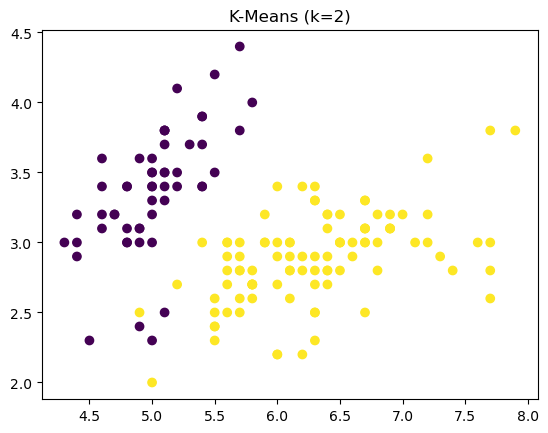

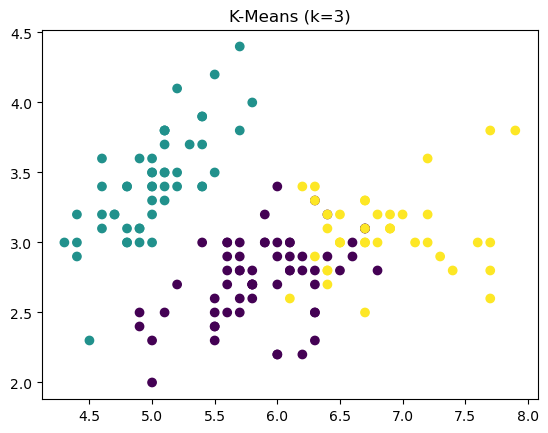

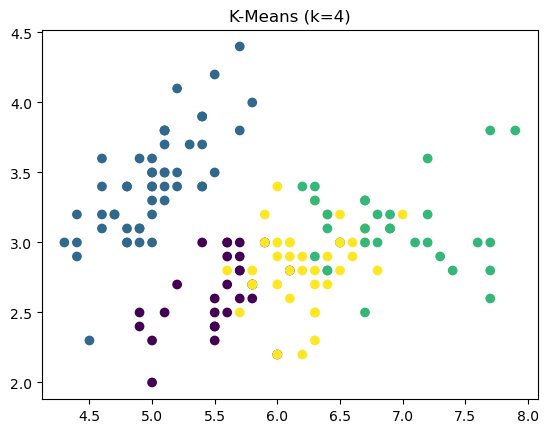

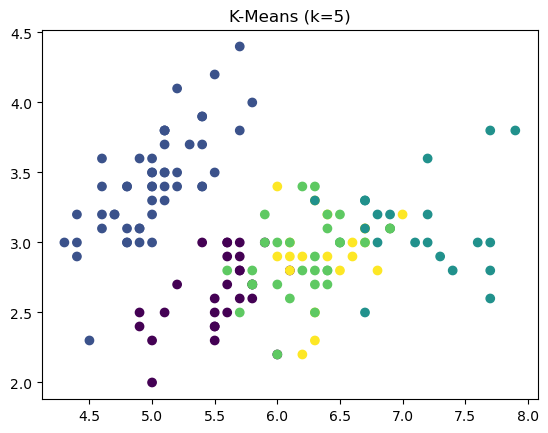

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

k_values = [2, 3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)

    # Визуализация результатов
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    plt.title(f'K-Means (k={k})')
    plt.show()

Опеределим оптимальное количество кластеров методом "локтя"

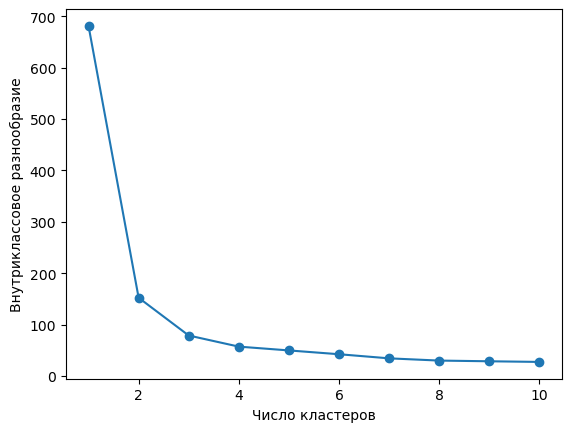

In [5]:
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Внутриклассовое разнообразие')
plt.show()


## 👨🏻‍💻 Практика 2 - Пример на PCA

In [6]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

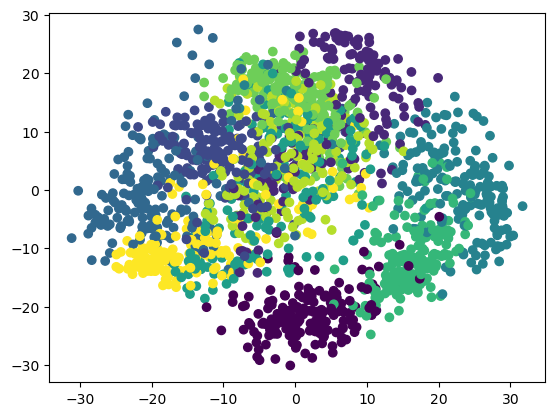

In [7]:
digits = load_digits()
X = digits.data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='viridis')
plt.show()

Загрузите набор данных MNIST с изображениями рукописных цифр.  
Примените PCA для понижения размерности до 2-х компонент.  
Визуализируйте результаты и оцените, насколько хорошо алгоритм сохранил структуру данных.  

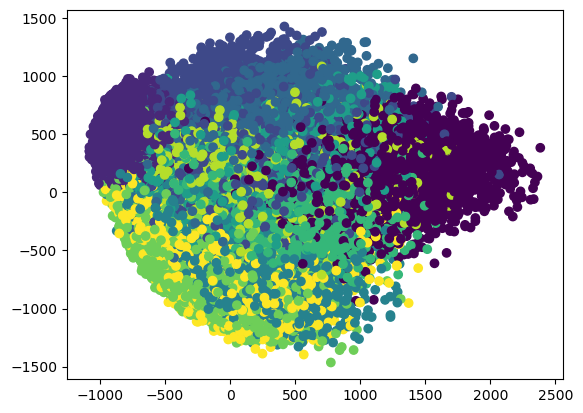

In [8]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data

# astype для преобразования значений в столбце 'class' в целочисленные значения
y = mnist.target.astype(int)

pca = PCA(n_components=2) 
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.show()

## 👨🏻‍💻 Практика 3  - Пример на Surprise (библиотека для рекомендательных систем)
На локальном ПК осталось мало памяти. Код без дополнительных установок не срабатывает. Поэтому он представлен как маркдаун без вывода результата.


In [9]:
# !pip install --upgrade pip

In [ ]:
# !pip install tensorflow

In [19]:
# !pip install surprise

In [20]:
# !pip show surprise

```
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
```

```
ratings_dict = {'itemID': [1, 1, 1, 2, 2],
                'userID': [1, 2, 3, 3, 4],
                'rating': [5, 4, 3, 3, 1]}

df = pd.DataFrame(ratings_dict)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
```

![](../images/03_01.png)<br>

![](../images/04_01.png)

На локальном ПК осталось мало памяти. Код без дополнительных установок не срабатывает. Необходимо поставить пакет Microsoft C++ Build tools https://visualstudio.microsoft.com/ru/visual-cpp-build-tools/

Поэтому он представлен как маркдаун без вывода результата.

Загрузите набор данных MovieLens (https://grouplens.org/datasets/movielens/).

Реализуйте простую рекомендательную систему с использованием коллаборативной фильтрации.
Оцените качество рекомендаций на тестовой выборке.

Подсказки
Создание рекомендательных систем с использованием библиотеки Surprise / Хабр (habr.com)
пакеты не могут собраться на Си

ERROR: Failed building wheel for scikit-surprise
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-surprise)

```
import random
from surprise.model_selection import train_test_split
from surprise import accuracy

ratings = pd.read_csv('data/ratings.csv')

reader = Reader(rating_scale=(0.5, 5))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)

mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

user_id = random.choice(ratings['userId'].unique())

def get_top_n_recommendations(algo, trainset, n=10):
    user_ids = trainset.all_users()
    top_n = {}

    for user_id in user_ids:
        watched_movies = set([i[1] for i in trainset.ur[user_id]])
        all_movies = set(trainset.all_items())
        unwatched_movies = all_movies - watched_movies

        predictions = [algo.predict(user_id, movie_id) for movie_id in unwatched_movies]
        
        top_n[user_id] = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return top_n

top_n_recommendations = get_top_n_recommendations(algo, trainset, n=5)

print(f'Рекомендации для пользователя : {user_id}')
for prediction in top_n_recommendations[user_id]:
    print(f'Фильм ID: {prediction.iid}, Предсказанная оценка: {prediction.est:.2f}')
```

![](../images/03_02.png)<br>

## 👨🏻‍💻 Практика 4  Пример на Prophet (библиотека Facebook для прогнозирования временных рядов)

In [10]:
# !pip install prophet

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 5.7 MB/s eta 0:00:03
   --------- ------------------------------ 3.7/14.8 MB 12.9 MB/s eta 0:00:01
   -------------------------------- ------- 12.1/14.8 MB 27.0 MB/s eta 0:00:01
   ---------------------------------------  14.7/14.8 MB 25.7 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [5]:
from prophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


In [8]:
# Пример данных (число пассажиров авиакомпании)
url = (
'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'
)
df = pd.read_csv(url)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


20:46:36 - cmdstanpy - INFO - Chain [1] start processing
20:46:37 - cmdstanpy - INFO - Chain [1] done processing


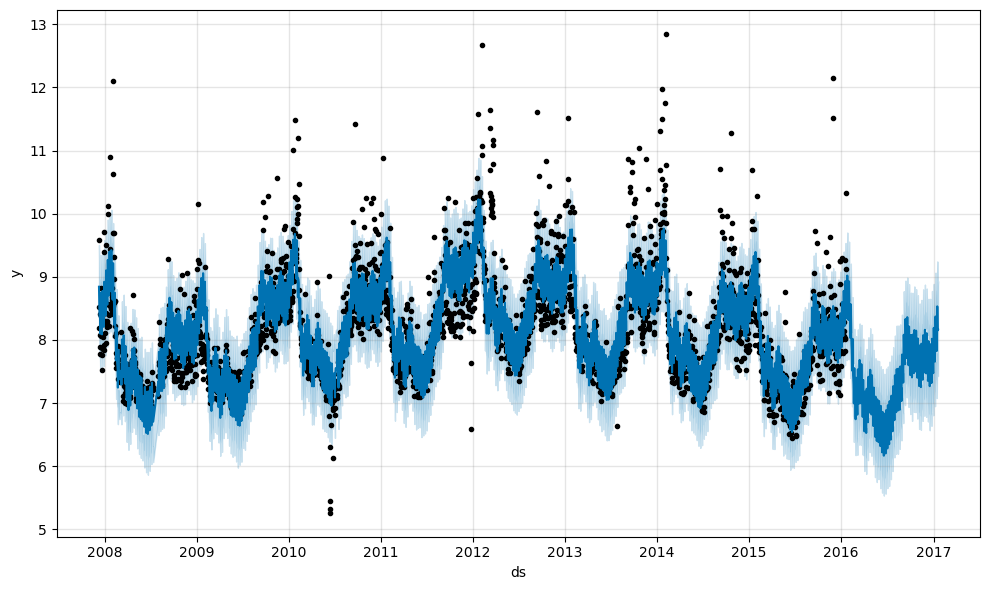

In [9]:
model = Prophet()

model.fit(df)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

fig = model.plot(forecast)

Найдите набор данных с временным рядом (например, данные о продажах, температуре, курсе валют).

[данные о курсе валют](../files/data_er.csv)

Визуализируйте данные и определите наличие тренда, сезонности.

In [17]:
# данные о курсах валюте
df = pd.read_csv(r'C:\Users\79181\n.brykovskaya\module_2\4ML\files\data_er.csv')
df.head()

,Date,LAK,AOA,ANG,NOK,XPF,AFN,MZN,DOP,CZK,...,ALL,LKR,ILA,BRX,INX,CAX,CUC,ISX,HUX,CZX
0,2018-04-14,8276.0,217.610992,1.78,7.77490,96.120003,69.699997,60.000000,49.400002,20.504999,...,104.199997,155.600006,NaN,3.4099,NaN,NaN,NaN,NaN,252.119995,NaN
1,2018-04-13,8276.0,217.610992,1.78,7.75401,96.220001,69.699997,60.250000,49.400002,20.524401,...,104.500000,155.600006,NaN,3.3852,NaN,NaN,NaN,NaN,252.119995,NaN
2,2018-04-12,8276.0,216.432999,1.78,7.78330,96.110001,69.699997,60.400002,49.400002,20.510201,...,104.250000,155.649994,NaN,3.4046,NaN,NaN,NaN,NaN,251.740005,NaN
3,2018-04-11,8279.0,216.608002,1.78,7.77334,95.800003,69.699997,60.599998,49.400002,20.450800,...,104.199997,155.649994,NaN,3.4189,NaN,NaN,NaN,NaN,252.820007,NaN
4,2018-04-10,8279.0,216.436996,1.78,7.82025,96.269997,69.699997,60.799999,49.400002,20.560699,...,104.199997,155.500000,NaN,3.3897,NaN,NaN,NaN,NaN,253.949997,NaN


In [19]:
df_uah = df[['Date', 'UAH']].copy()
df_uah = df_uah.rename(columns={'Date': 'ds', 'UAH': 'y'})
df_uah.head()

,ds,y
0,2018-04-14,26.145000
1,2018-04-13,26.145000
2,2018-04-12,25.969999
3,2018-04-11,25.930000
4,2018-04-10,25.965000


21:01:40 - cmdstanpy - INFO - Chain [1] start processing
21:01:40 - cmdstanpy - INFO - Chain [1] done processing


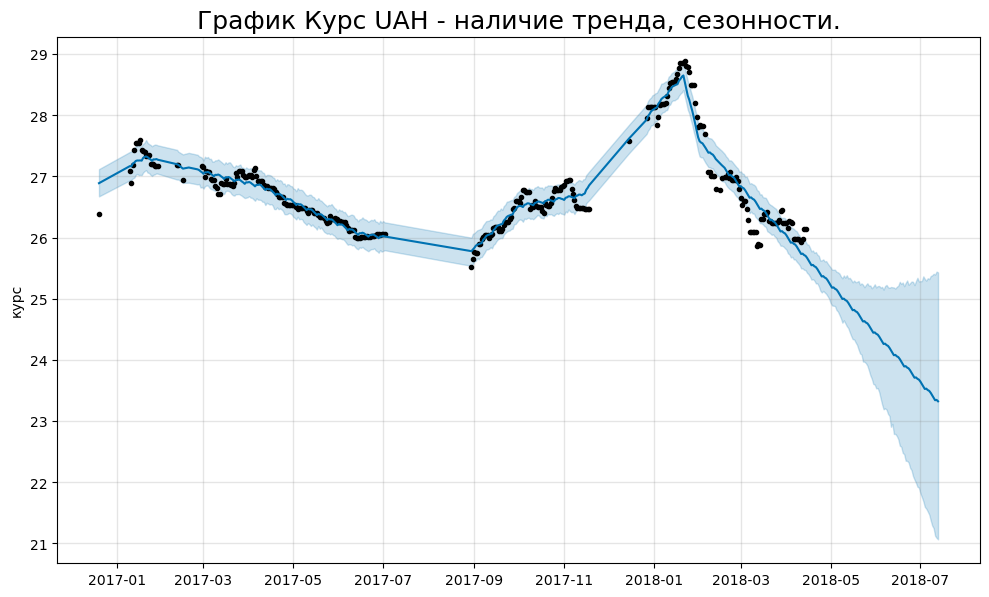

In [27]:
model = Prophet()
model.fit(df_uah)
future = model.make_future_dataframe(periods=90)
foreacast = model.predict(future)
fig = model.plot(foreacast, xlabel='Дата', ylabel='курс')

ax = fig.gca()
ax.set_title("График Курс UAH - наличие тренда, сезонности.", 
             size=18)
ax.set_xlabel("", size=34)
ax.set_ylabel("курс", size=10)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)


## 👨🏻‍💻 Практика 5 - Простая модель прогнозирования (ARIMA) 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Загрузка данных
data = pd.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', 
    header=0, index_col=0)

# Преобразуем индекс в datetime
data.index = pd.to_datetime(data.index)

# Устанавливаем явную частоту для временного индекса (например, 'MS' - начало месяца)
data.index = data.index.to_period('M')

# Разделение на обучающую и тестовую выборки
train_data = data[:-12]
test_data = data[-12:]

# Построение модели ARIMA(5,1,0)
# (p=5, d=1, q=0 - параметры модели, подбираются экспериментально)
model = ARIMA(train_data['Passengers'], order=(5, 1, 0))

# Обучение модели
model_fit = model.fit()

# Предсказание на тестовой выборке
predictions = model_fit.forecast(steps=len(test_data))  # Прогнозируем на длину тестовых данных

# Оценка точности модели
mae = mean_absolute_error(test_data['Passengers'], predictions)

# Вычисление MSE (Mean Squared Error)
mse = mean_squared_error(test_data['Passengers'], predictions)

# Вычисление RMSE вручную
rmse = np.sqrt(mse)

# Вывод результатов
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Преобразуем индекс в datetime для корректной визуализации
test_data.index = test_data.index.to_timestamp()
predictions_index = test_data.index

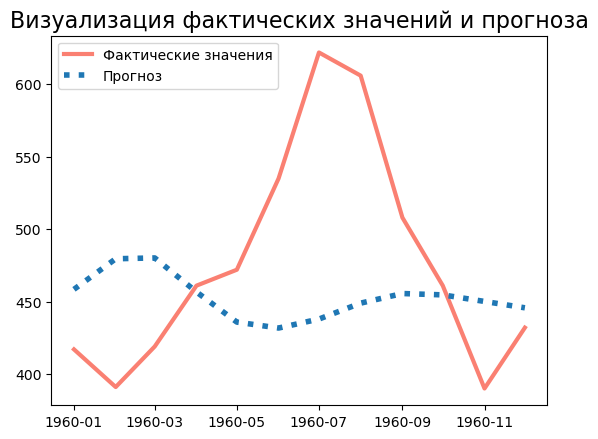

In [65]:
# Визуализация фактических значений и прогноза
plt.plot(test_data['Passengers'], label='Фактические значения', 
         color='salmon', 
         linestyle = '-', 
         linewidth = 3,)
plt.plot(predictions_index, predictions, label='Прогноз',
        linestyle = 'dotted', linewidth = 4)
plt.title('Визуализация фактических значений и прогноза',
         size=16)
plt.legend()
plt.show()

Пояснение:

1. Загрузка и подготовка данных:
   - Загружаем данные о количестве пассажиров.
   - Преобразуем индекс в формат datetime.
   - Разделяем данные на обучающую (все кроме последних 12 месяцев) и тестовую (последние 12 месяцев) выборки.
2. Создание и обучение модели:

   - Создаем модель ARIMA с параметрами order=(5,1,0).
     - p=5:  используем 5 лаговых значений ряда (авторегрессия).
     - d=1:  дифференцируем ряд 1 раз для обеспечения стационарности.
     - q=0:  не используем скользящее среднее.
   - Обучаем модель на тренировочных данных.

3.Прогнозирование:
   - Предсказываем значения на тестовой выборке.

4. Оценка точности:
   - Рассчитываем MAE и RMSE, чтобы оценить, насколько точны прогнозы модели.

5. Визуализация:
   - Строим график фактических и предсказанных значений для наглядности.


Важно:
- Выбор параметров p, d, q для модели ARIMA  важен и может существенно влиять на точность прогноза. Существуют методы для автоматического подбора этих параметров.

- В реальных задачах может потребоваться дополнительная предобработка данных, анализ сезонности и другие действия для повышения точности модели.